# Report: Distribution of traffic accidents in Berlin

// Description

## Install dependencies
Initially, install all required dependencies.

In [ ]:
%pip install pandas
%pip install plotly
%pip install nbformat

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px


# Accident data

// Description: What data and what has been done in data pipepline?

## Load data

Create a pandas dataframe using the local sqlite file.

In [79]:
accidents = pd.read_sql_table('accidents', 'sqlite:///../accidents.sqlite')
accidents.head()

OBJECTID                         BEZ  UJAHR  UMONAT  USTUNDE  UWOCHENTAG  \
0    219249                      Pankow   2021      11       18      Montag   
1    219248        Tempelhof-Schöneberg   2021      12       19     Samstag   
2    219247  Charlottenburg-Wilmersdorf   2021      12       17    Mittwoch   
3    219246  Charlottenburg-Wilmersdorf   2021      12       15     Samstag   
4    219243                 Lichtenberg   2021      12        9  Donnerstag   

                    UKATEGORIE  UART                       UTYP1  ULICHTVERH  \
0  Unfall mit Leichtverletzten     0  Einbiegen / Kreuzen-Unfall  Dunkelheit   
1  Unfall mit Leichtverletzten     6               Abbiegeunfall  Dunkelheit   
2  Unfall mit Leichtverletzten     5               Abbiegeunfall  Dunkelheit   
3  Unfall mit Leichtverletzten     5               Abbiegeunfall   Dämmerung   
4  Unfall mit Leichtverletzten     3      Unfall im Längsverkehr  Tageslicht   

   IstRad  IstPKW  IstFuss  IstKrad  IstGkfz  IstSonstige  USTRZUSTAND  \
0       0       1        0        1        0            0  nass/feucht   
1       0       1        1        0        0            0  nass/feucht   
2       0       1        0        0        0            0      trocken   
3       0       1        0        1        0            0  nass/feucht   
4       0       1        0        0        0            1  winterglatt   

   XGCSWGS84  YGCSWGS84     BETEILIGT  
0  13.426895  52.533940      PKW-Krad  
1  13.392090  52.439951      PKW-Fuss  
2  13.326242  52.538028           PKW  
3  13.316521  52.499534      PKW-Krad  
4  13.525752  52.493867  PKW-Sonstige

In [80]:
sns.set_palette("icefire")

## When did the accidents happen?

Number of accidents each month

In [84]:
accidents.groupby(["UMONAT"]).OBJECTID.count()

UMONAT
1      481
2      436
3      765
4      720
5      991
6     1314
7     1053
8     1274
9     1300
10    1130
11    1007
12     796
Name: OBJECTID, dtype: int64

Comment

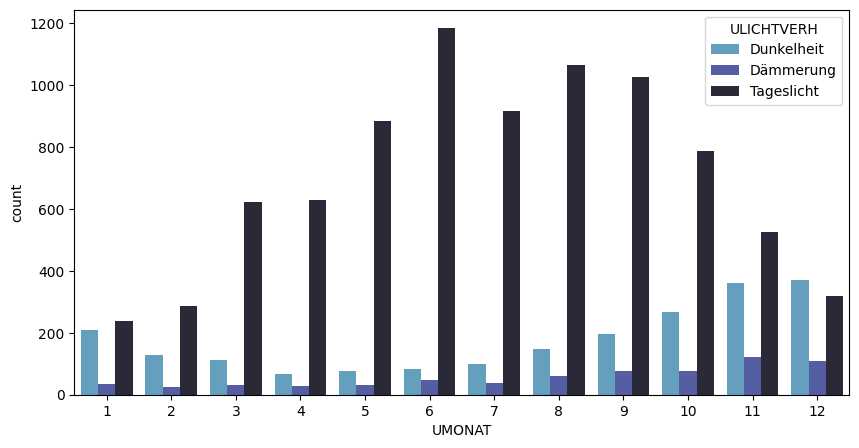

In [81]:
f,ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'UMONAT', hue='ULICHTVERH', data = accidents)
plt.show()

Comment

## What type of accidents happend?

Type of accidents

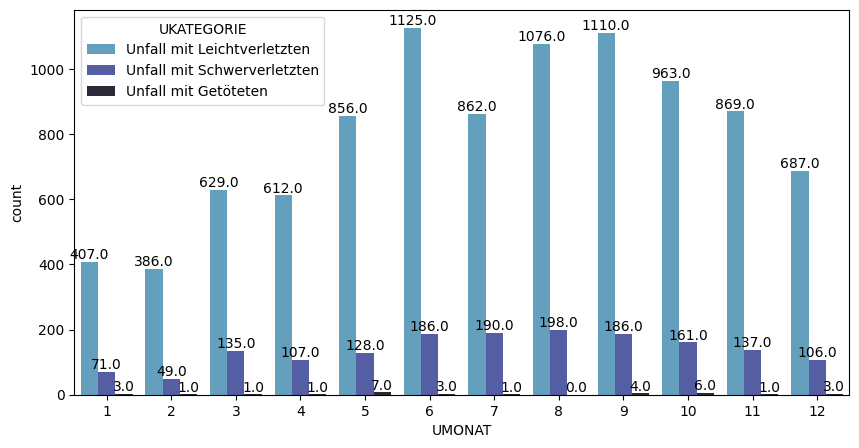

In [87]:
f,ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'UMONAT', hue='UKATEGORIE', data = accidents)

for p in ax.patches:
   ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()

Comment

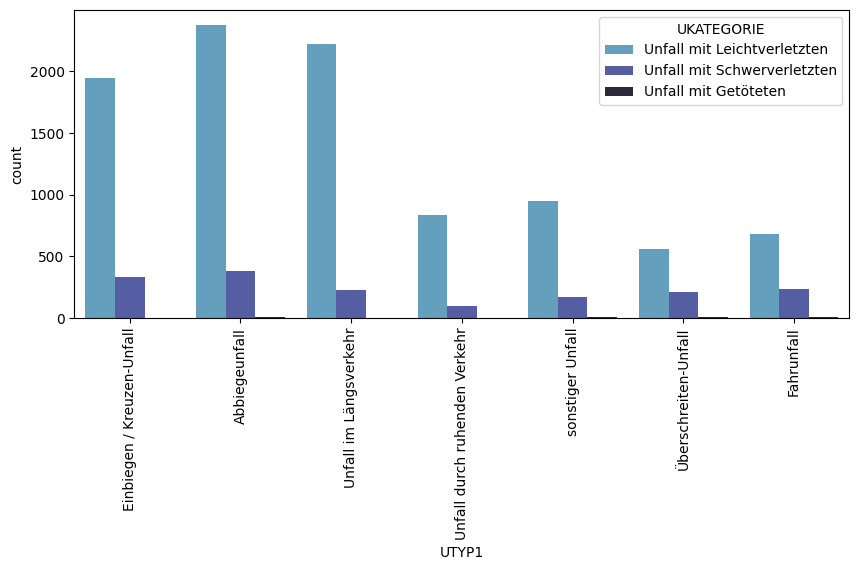

In [86]:
f,ax = plt.subplots(figsize=(10,4))
sns.countplot(x = 'UTYP1', hue='UKATEGORIE', data = accidents)
plt.xticks(rotation='vertical')
plt.show()

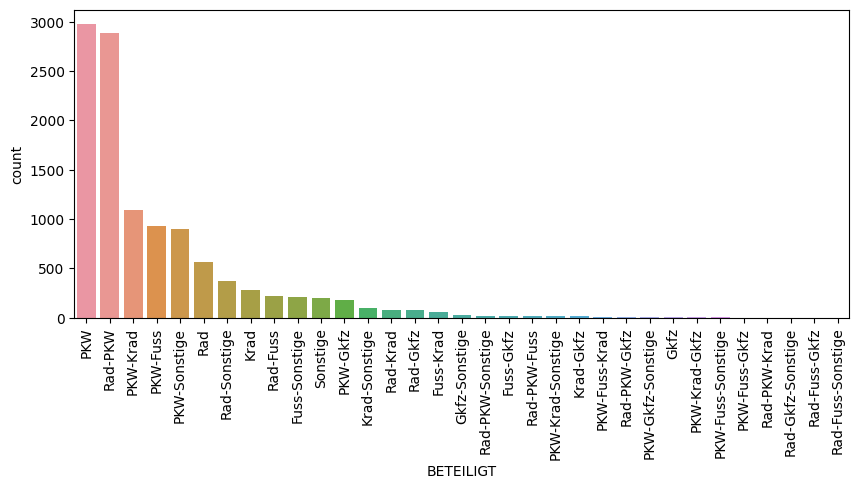

In [88]:
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x='BETEILIGT', data=accidents, order=accidents['BETEILIGT'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

Have a look at particularly serious accidents with deaths

In [89]:
deaths = accidents[accidents['UKATEGORIE'] == 'Unfall mit Getöteten']

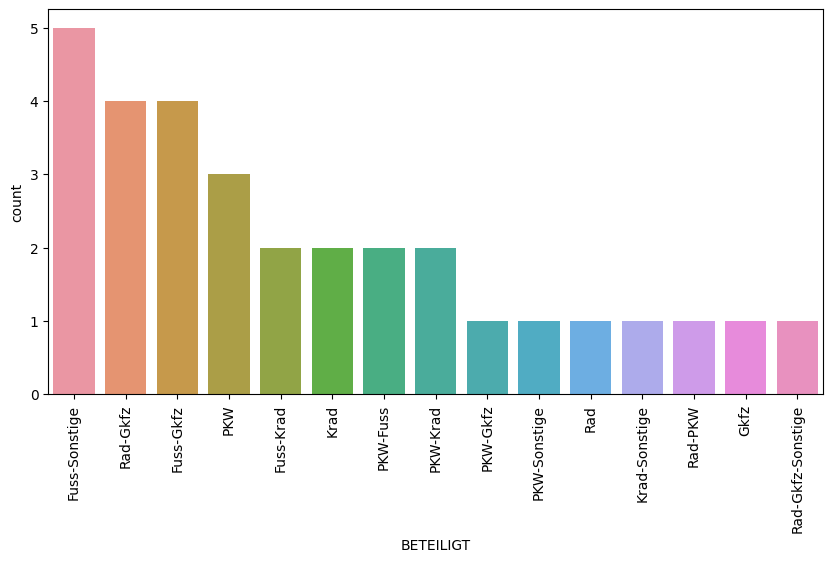

In [60]:
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x='BETEILIGT', data=deaths, order=deaths['BETEILIGT'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

Most deadly accidents happend between pedestrians and bikers and big vehicals. Others include Busses and trams.
...

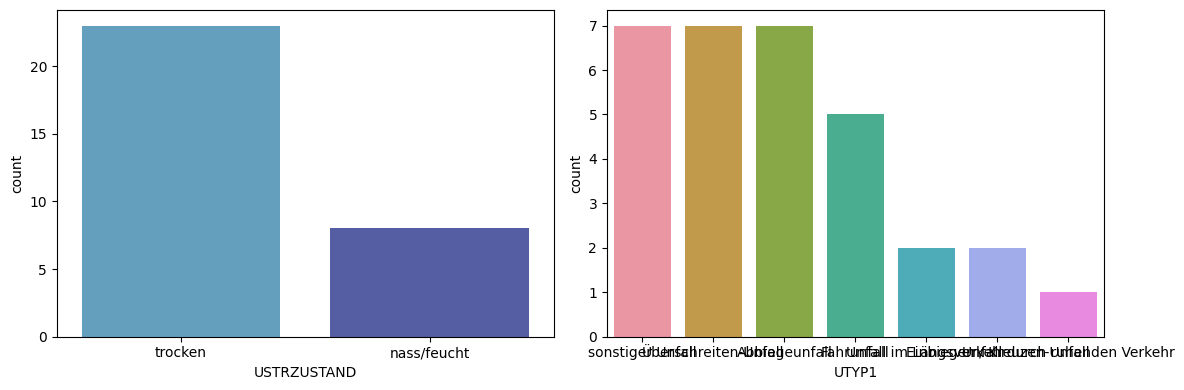

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x='USTRZUSTAND', data=deaths, order=deaths['USTRZUSTAND'].value_counts().index, ax=axes[0])

sns.countplot(x='UTYP1', data=deaths, order=deaths['UTYP1'].value_counts().index, ax=axes[1])

plt.tight_layout()

plt.show()

## When did the accidents happen?

In [99]:
freq = accidents.groupby(['USTUNDE', 'UWOCHENTAG']).OBJECTID.count()
freq

USTUNDE  UWOCHENTAG
0        Dienstag      15
         Donnerstag    10
         Freitag       13
         Mittwoch      16
         Montag        10
                       ..
23       Freitag       28
         Mittwoch      20
         Montag        18
         Samstag       26
         Sonntag       28
Name: OBJECTID, Length: 168, dtype: int64

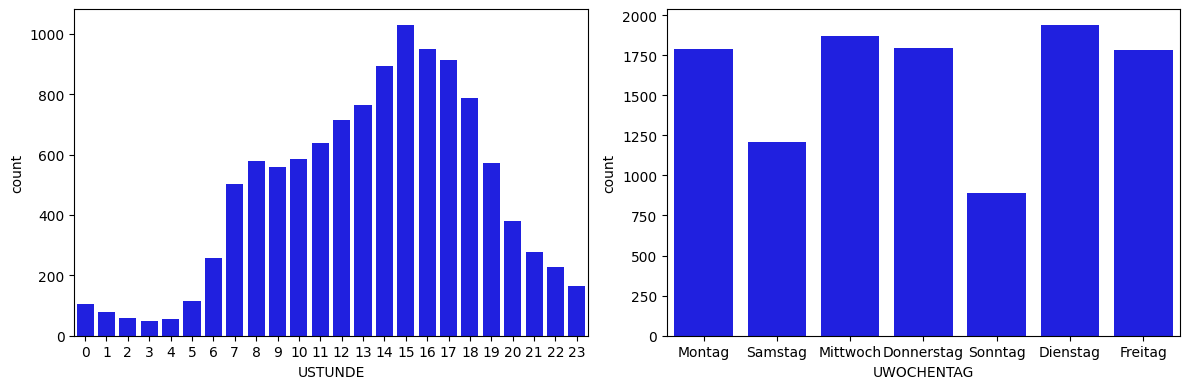

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x='USTUNDE', data=accidents, color = 'blue', ax=axes[0])

sns.countplot(x='UWOCHENTAG', data=accidents, color = 'blue',ax=axes[1])

plt.tight_layout()
plt.show()

Comment

## Where did the accidents happen?
First of all we have a look at the different districts and the amount of accidents there

In [96]:
accidents.groupby(["BEZ"]).OBJECTID.count()

BEZ
Charlottenburg-Wilmersdorf    1398
Friedrichshain-Kreuzberg      1107
Lichtenberg                    619
Marzahn-Hellersdorf            538
Mitte                         1761
Neukölln                       799
Pankow                        1011
Reinickendorf                  729
Spandau                        713
Steglitz-Zehlendorf            757
Tempelhof-Schöneberg          1059
Treptow-Köpenick               776
Name: OBJECTID, dtype: int64

To answer this question, we use plotly to draw a scatterplot of all accidents overlaying it on a map from OpenStreetMap.
The dots are colored based on the accident's type, allowing us to see what type of accident happend where.

### Visualize cooridnates on map

In [64]:
pio.renderers.default = "notebook"

fig = px.scatter_mapbox(accidents, 
                        lat="YGCSWGS84", 
                        lon="XGCSWGS84", 
                        hover_name="OBJECTID", 
                        hover_data=["BEZ", "USTRZUSTAND", "UMONAT"],
                        color="UKATEGORIE",
                        zoom=8, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Traffic sensor data

Now we want to analyse the traffic in Berlin. As the hourly traffic sensor data for the whole year is too big, the dataset had to be reduced.
This has been done in two ways:
- Limit time frame to one month: Since the data exploration has shown that most accidents happend in June we will take a closer look at the traffic in June 2021.
- Aggregate the data: To analyse the traffic of the whole year 2021 the hourly data has been aggregated to daily averages for every sensor.

## Hourly traffic data for June 2021

In [ ]:
traffic_june = pd.read_sql_table('traffic_month', 'sqlite:///../traffic.sqlite')

In [ ]:
traffic_june.head()

detid_15        tag  stunde  qualitaet  q_kfz_det_hr  v_kfz_det_hr  \
0  100101010001076 2021-06-01       0       0.83            24            42   
1  100101010001076 2021-06-01       2       0.75            21            41   
2  100101010001076 2021-06-01       3       0.92            15            51   
3  100101010001076 2021-06-01       4       0.92            56            56   
4  100101010001076 2021-06-01       5       1.00           149            54   

   q_pkw_det_hr  v_pkw_det_hr  q_lkw_det_hr  v_lkw_det_hr  ...  \
0            17            42             7            42  ...   
1            20            40             1            61  ...   
2            10            46             5            62  ...   
3            46            56            10            55  ...   
4           133            54            16            55  ...   

           MQ_ID15          STRASSE  \
0  100201010000481  Berliner Straße   
1  100201010000481  Berliner Straße   
2  100201010000481  Berliner Straße   
3  100201010000481  Berliner Straße   
4  100201010000481  Berliner Straße   

                                            POSITION  POS_DETAIL  RICHTUNG  \
0  zwischen Seehofstraße und Gartenstraße, in Höh...   Clayallee      West   
1  zwischen Seehofstraße und Gartenstraße, in Höh...   Clayallee      West   
2  zwischen Seehofstraße und Gartenstraße, in Höh...   Clayallee      West   
3  zwischen Seehofstraße und Gartenstraße, in Höh...   Clayallee      West   
4  zwischen Seehofstraße und Gartenstraße, in Höh...   Clayallee      West   

   SPUR                 annotation LÄNGE (WGS84) BREITE (WGS84) INBETRIEBNAHME  
0  HF_R  Hauptfahrbahn rechte Spur     13.263106      52.435112     2003-02-19  
1  HF_R  Hauptfahrbahn rechte Spur     13.263106      52.435112     2003-02-19  
2  HF_R  Hauptfahrbahn rechte Spur     13.263106      52.435112     2003-02-19  
3  HF_R  Hauptfahrbahn rechte Spur     13.263106      52.435112     2003-02-19  
4  HF_R  Hauptfahrbahn rechte Spur     13.263106      52.435112     2003-02-19  

[5 rows x 24 columns]

During which hours was the most traffic?

In [100]:
traffic_hours = traffic_june.groupby("stunde")[["q_kfz_det_hr","v_kfz_det_hr"]].mean()
traffic_hours

q_kfz_det_hr  v_kfz_det_hr
stunde                            
0          98.779946     45.341039
1          71.809535     45.529122
2          55.354300     45.358345
3          50.662473     45.652674
4          70.328243     47.189281
5         160.508675     47.735653
6         256.334859     45.743716
7         308.271240     43.347010
8         347.980413     41.925263
9         350.840893     41.458061
10        347.582088     41.478613
11        355.925554     41.033158
12        367.873839     40.677027
13        382.952530     40.525058
14        396.336787     40.122169
15        401.855188     39.636400
16        393.454472     40.175331
17        380.978045     41.433485
18        356.601835     42.455022
19        301.567616     43.608159
20        255.780471     44.751818
21        208.116794     45.098477
22        177.382593     44.681663
23        141.224484     45.464909

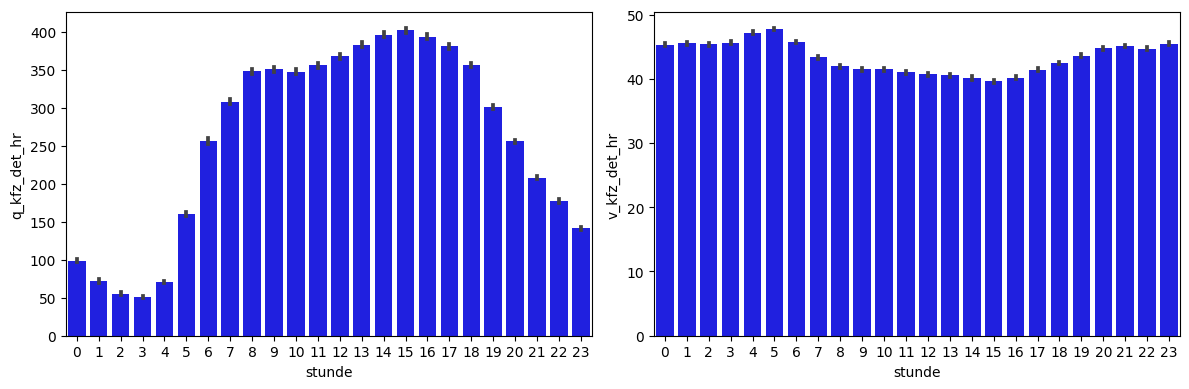

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.barplot(x='stunde', y= 'q_kfz_det_hr', data=traffic_june, color = 'blue', ax=axes[0])
sns.barplot(x='stunde', y= 'v_kfz_det_hr', data=traffic_june, color = 'blue', ax=axes[1])

plt.tight_layout()
plt.show()

Comment

## Daily traffic Data for 2021

In [104]:
traffic_2021 = pd.read_sql_table('traffic_2021', 'sqlite:///../traffic.sqlite')
traffic_2021.head()

detid_15         tag  qualitaet  q_kfz_det_hr  v_kfz_det_hr  \
0  100101010000167  01.01.2021        1.0    262.958333     76.279167   
1  100101010000167  02.01.2021        1.0    425.458333     76.316667   
2  100101010000167  03.01.2021        1.0    345.708333     71.070833   
3  100101010000167  04.01.2021        1.0    546.000000     78.025000   
4  100101010000167  05.01.2021        1.0    568.958333     76.570833   

   q_pkw_det_hr  v_pkw_det_hr  q_lkw_det_hr  v_lkw_det_hr MQ_KURZNAME  ...  \
0    259.833333     76.483333      3.125000     56.312500       TE001  ...   
1    415.958333     76.995833      9.500000     67.666667       TE001  ...   
2    337.791667     72.037500      7.916667     61.408333       TE001  ...   
3    481.291667     79.308333     64.708333     72.920833       TE001  ...   
4    508.333333     78.466667     60.625000     68.250000       TE001  ...   

           MQ_ID15 STRASSE                     POSITION     POS_DETAIL  \
0  100201010000077    A115  AS Spanische Allee – Brücke  AK Zehlendorf   
1  100201010000077    A115  AS Spanische Allee – Brücke  AK Zehlendorf   
2  100201010000077    A115  AS Spanische Allee – Brücke  AK Zehlendorf   
3  100201010000077    A115  AS Spanische Allee – Brücke  AK Zehlendorf   
4  100201010000077    A115  AS Spanische Allee – Brücke  AK Zehlendorf   

  RICHTUNG  SPUR                 annotation LÄNGE (WGS84) BREITE (WGS84)  \
0  Südwest  HF_R  Hauptfahrbahn rechte Spur     13.192578      52.433868   
1  Südwest  HF_R  Hauptfahrbahn rechte Spur     13.192578      52.433868   
2  Südwest  HF_R  Hauptfahrbahn rechte Spur     13.192578      52.433868   
3  Südwest  HF_R  Hauptfahrbahn rechte Spur     13.192578      52.433868   
4  Südwest  HF_R  Hauptfahrbahn rechte Spur     13.192578      52.433868   

  INBETRIEBNAHME  
0     2003-02-18  
1     2003-02-18  
2     2003-02-18  
3     2003-02-18  
4     2003-02-18  

[5 rows x 23 columns]

## Overall average for every location

In [105]:
traffic_sensors = traffic_2021.groupby('detid_15')[["q_kfz_det_hr","v_kfz_det_hr","q_pkw_det_hr","v_pkw_det_hr","q_lkw_det_hr","v_lkw_det_hr","LÄNGE (WGS84)","BREITE (WGS84)"]].mean()
traffic_sensors.head()

q_kfz_det_hr  v_kfz_det_hr  q_pkw_det_hr  v_pkw_det_hr  \
detid_15                                                                  
100101010000167    598.534309     73.211145    543.981243     73.746364   
100101010000268    258.914647     16.603448    245.454833     16.583475   
100101010000369    691.499836     71.060631    642.383431     71.657294   
100101010000470    444.206885     71.402508    437.450739     71.589132   
100101010000874    113.676270     45.372045    101.340567     45.721118   

                 q_lkw_det_hr  v_lkw_det_hr  LÄNGE (WGS84)  BREITE (WGS84)  
detid_15                                                                    
100101010000167     54.548941     68.923387      13.192578       52.433868  
100101010000268     13.449999      9.716189      13.192578       52.433868  
100101010000369     49.115088     61.149071      13.192747       52.433813  
100101010000470      6.759297     42.159404      13.192747       52.433813  
100101010000874     12.336432     41.605736      13.261301       52.436642

## Find locations with high traffic

In [106]:
traffic_sensors.describe()

q_kfz_det_hr  v_kfz_det_hr  q_pkw_det_hr  v_pkw_det_hr  q_lkw_det_hr  \
count    539.000000    539.000000    539.000000    539.000000    539.000000   
mean     239.596443     42.457792    222.332425     42.559690     17.285348   
std      117.844477     10.436542    112.206848     10.543432     23.981083   
min        0.184524      2.599775      0.092262      1.685205      0.092262   
25%      165.729902     36.629931    152.962518     36.934849      6.213529   
50%      243.944595     42.831785    224.619612     42.921621     11.354520   
75%      306.982659     48.691962    286.835738     48.889107     17.704100   
max     1152.207986     93.299904   1085.388021     96.597820    243.822927   

       v_lkw_det_hr  LÄNGE (WGS84)  BREITE (WGS84)  
count    539.000000     539.000000      539.000000  
mean      35.912091      13.388133       52.502504  
std       10.830563       0.075730        0.039157  
min        0.901515      13.156639       52.398253  
25%       30.357383      13.346215       52.481545  
50%       36.520420      13.384701       52.508231  
75%       42.419803      13.432945       52.528842  
max       92.058322      13.595328       52.586297

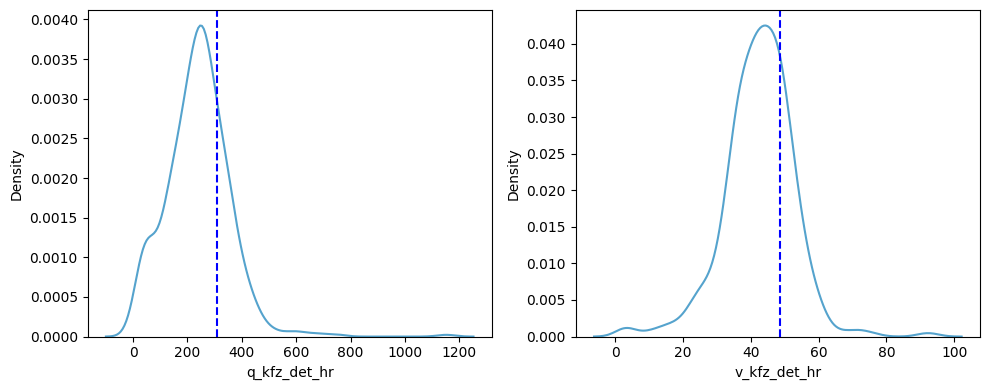

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(data=traffic_sensors, x="q_kfz_det_hr", ax=axes[0])
quantile_75_q = traffic_sensors['q_kfz_det_hr'].quantile(0.75)
axes[0].axvline(quantile_75_q, color='b', linestyle='--', label='75th Percentile')

sns.kdeplot(data=traffic_sensors, x="v_kfz_det_hr", ax=axes[1])
quantile_75_v = traffic_sensors['v_kfz_det_hr'].quantile(0.75)
axes[1].axvline(quantile_75_v, color='b', linestyle='--', label='75th Percentile')

plt.tight_layout()
plt.show()

Locations with more traffic (above 75% quantil)

In [ ]:
high_traffic = traffic_sensors[(traffic_sensors["q_kfz_det_hr"] > 306.982659)]
high_traffic['label'] = 'high quantity'

Locations with more traffic (above 75% quantil)

In [ ]:
fast_traffic = traffic_sensors[(traffic_sensors["v_kfz_det_hr"] > 48.691962)]
fast_traffic['label'] = 'high velocity'

In [ ]:
traffic_int = high_traffic.append(fast_traffic)

In [78]:
fig = px.scatter_mapbox(traffic_int, 
                        lat='BREITE (WGS84)', 
                        lon='LÄNGE (WGS84)',  
                        hover_data=['q_kfz_det_hr', 'v_kfz_det_hr'],
                        color="label",
                        zoom=10, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Combine both data sources